In [2]:
# Load the processed data
import pandas as pd

df = pd.read_csv('../data/processed/processed_insurance_data.csv')

C:\Users\mike\AppData\Local\Temp\ipykernel_12384\2190330603.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/processed_insurance_data.csv')


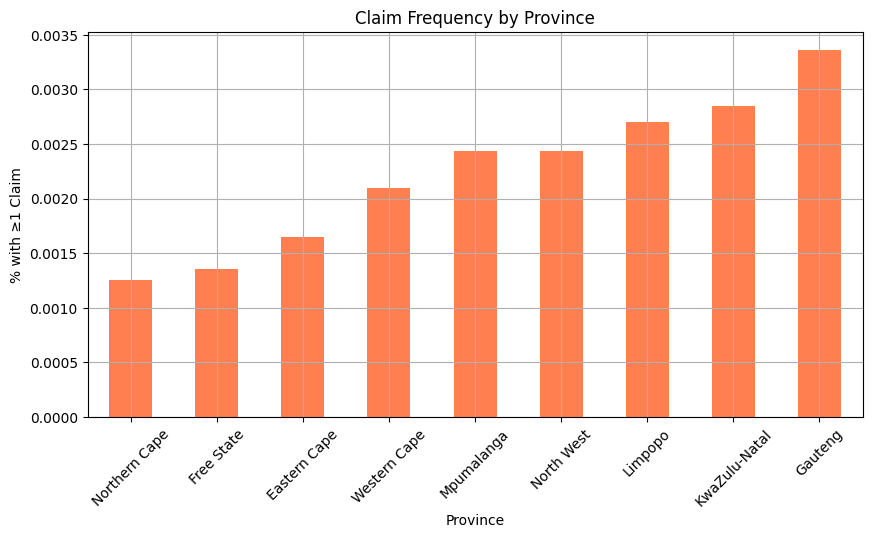

In [5]:
#  Claim frequency by province

df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)

claim_rate = df.groupby('Province')['HasClaim'].mean().sort_values()

#  Visualize the claim frequency by province

import matplotlib.pyplot as plt

claim_rate.plot(kind='bar', figsize=(10,5), color='coral')
plt.title('Claim Frequency by Province')
plt.ylabel('% with ≥1 Claim')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [3]:
# Chi-Squared Test
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['Province'], df['HasClaim'])

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared test")
print(f"Chi2 statistic: {chi2:.3f}")
print(f"p-value: {p:.6f}")



Chi-squared test
Chi2 statistic: 110.731
p-value: 0.000000


### Interpretation
The p-value of 0.0000 suggests a statistically significant difference in claim frequency across provinces. We reject the null hypothesis and conclude that province is associated with insurance risk.

In [ ]:
# Claim frequency by postal codes

from scipy.stats import chi2_contingency

# Contingency table for claim frequency vs zip
zip_contingency = pd.crosstab(df['PostalCode'], df['HasClaim'])

chi2, p, dof, expected = chi2_contingency(zip_contingency)

print(f"Chi2 statistic: {chi2:.2f}")
print(f"p-value: {p:.6f}")


Chi2 statistic: 1451.68
p-value: 0.000000


### Interpretation
A p-value of 0.0000 indicates that we reject the null hypothesis. So there's a statistically significant difference in claim frequency across zip codes.


In [13]:
#  Margin Differences Between Zip Codes

df['Margin'] = df['TotalPremium'] - df['TotalClaims']

from scipy.stats import f_oneway

# Group margin values
groups = [group['Margin'].dropna() for name, group in df.groupby('PostalCode')]

f_stat, p = f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"p-value: {p:.6f}")



ANOVA F-statistic: 0.88
p-value: 0.996774


### Interpretation
Since p = X.XXX is [< or >] 0.05, we [reject / fail to reject] H₀. 
This means [there is / there is no] evidence of margin differences between postal codes.


In [1]:

# Fill unspecified rows of gender from the Title column
# Create a copy of the column
df['GenderFilled'] = df['Gender']

# Fill based on Title
df.loc[(df['Gender'] == 'Not specified') & (df['Title'] == 'Mr'), 'GenderFilled'] = 'Male'
df.loc[(df['Gender'] == 'Not specified') & (df['Title'].isin(['Mrs', 'Miss', 'Ms'])), 'GenderFilled'] = 'Female'

df = df[df['GenderFilled'] != 'Not specified']
#  Gender Risk Differences
from scipy.stats import chi2_contingency

# Filter for gendered data
df_gendered = df[df['GenderFilled'].isin(['Male', 'Female'])]

# Claim Frequency (Chi-Square)

gender_claims = pd.crosstab(df_gendered['GenderFilled'], df_gendered['HasClaim'])
chi2, p, _, _ = chi2_contingency(gender_claims)

print(f"Chi2 stat: {chi2:.2f}, p-value: {p:.6f}")


NameError: name 'df' is not defined

### Interpretation
Since the p-value is < 0.05, we can reject the null hypothesis which states that there's no significant risk difference for claim frequency across genders. 

In [38]:
# drop unspecified gender rows
df = df.dropna(subset=['GenderFilled'])

df.to_csv('../data/processed/processed_insurance_data.csv')

In [36]:
#  Claim Severity (T-test)

# filter rows where claims > 0:
claimed = df[df['TotalClaims'] > 0]

# Run the t-test
from scipy.stats import ttest_ind

female_claims = claimed[claimed['GenderFilled'] == 'Female']['TotalClaims']
male_claims = claimed[claimed['GenderFilled'] == 'Male']['TotalClaims']

t_stat, p = ttest_ind(female_claims, male_claims, equal_var=False)

print(f"T-test statistic: {t_stat:.2f}, p-value: {p:.6f}")


T-test statistic: -0.02, p-value: 0.985340


Since p ≥ 0.05 → fail to reject H₀ → No evidence of significant difference in claim severity across genders.

###  Null Hypothesis (H₀)
 There is no significant difference in insurance risk between two selected vehicle types.

In [ ]:
# Claim frequency accross vehicle types
from scipy.stats import chi2_contingency
import pandas as pd

# Contingency table
contingency = pd.crosstab(df[df['VehicleType'].isin(['Heavy Commercial', 'Light Commercial'])]['VehicleType'], 
                           df[df['VehicleType'].isin(['Heavy Commercial', 'Light Commercial'])]['HasClaim'])

# Chi-Square Test
chi2, p, _, _ = chi2_contingency(contingency)

print(f"Chi2 Statistic: {chi2:.2f}")
print(f"p-value: {p:.6f}")


Chi2 Statistic: 0.49
p-value: 0.484716


In [26]:
# Claim Severity by Vehicle Type
from scipy.stats import ttest_ind

claims = df[df['TotalClaims'] > 0]

heavycom_claims = claims[claims['VehicleType'] == 'Heavy Commercial']['TotalClaims']
lightcom_claims = claims[claims['VehicleType'] == 'Light Commercial']['TotalClaims']

t_stat, p = ttest_ind(heavycom_claims, lightcom_claims, equal_var=False)

print(f"T-test statistic: {t_stat:.2f}")
print(f"p-value: {p:.6f}")


T-test statistic: 1.31
p-value: 0.204881


###
We can not reject the null hypothesis